<a href="https://colab.research.google.com/github/sahilfaizal01/Image-Compression-and-Denoising-using-CNN/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

# **Loading the Dataset**

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [5]:
x_test.shape

(10000, 28, 28, 1)

# **Model Building**

In [6]:
model = Sequential()
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,padding='same'))
model.add(Conv2D(16,3,activation='relu',padding='same'))
model.add(MaxPooling2D(2,padding='same'))
model.add(Conv2D(16,3,activation='relu',padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid',padding='same'))
model.compile(optimizer='adam',loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

In [7]:
model.fit(x_train,x_train,epochs=30,batch_size=256,validation_data=(x_test,x_test))

Epoch 1/30
235/235 [==============================] - 139s 585ms/step - loss: 0.1766 - val_loss: 0.0876
Epoch 2/30
235/235 [==============================] - 136s 578ms/step - loss: 0.0834 - val_loss: 0.0791
Epoch 3/30
235/235 [==============================] - 138s 588ms/step - loss: 0.0783 - val_loss: 0.0763
Epoch 4/30
235/235 [==============================] - 139s 592ms/step - loss: 0.0761 - val_loss: 0.0746
Epoch 5/30
235/235 [==============================] - 137s 583ms/step - loss: 0.0747 - val_loss: 0.0735
Epoch 6/30
235/235 [==============================] - 143s 608ms/step - loss: 0.0738 - val_loss: 0.0726
Epoch 7/30
235/235 [==============================] - 145s 616ms/step - loss: 0.0730 - val_loss: 0.0722
Epoch 8/30
235/235 [==============================] - 141s 601ms/step - loss: 0.0723 - val_loss: 0.0713
Epoch 9/30
235/235 [==============================] - 137s 582ms/step - loss: 0.0718 - val_loss: 0.0709
Epoch 10/30
235/235 [==============================] - 139s 590m

# **Evaluation**

In [8]:
pred = model.predict(x_test)

313/313 [==============================] - 6s 19ms/step


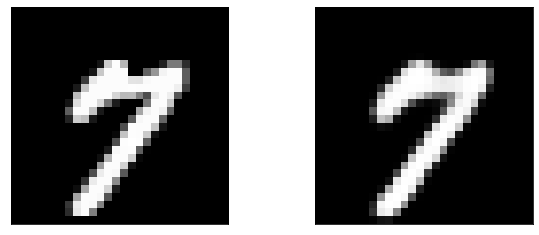

In [12]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))
ax = plt.subplot(1,2,1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1,2,2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)